<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**모두를 위한 딥러닝 시즌2 with Pytorch - LAB 09**

**주제 - ReLU**

목차
- Problem of Sigmoid
- ReLU
- Optimizer in PyTorch
- Review : MNIST
- Code : mnist_softmax
- Code : mnist_nn

SIgmoid의 문제점

Sigmoid를 activation function으로 사용하는 네트워크가 있다고 가정해보자. 

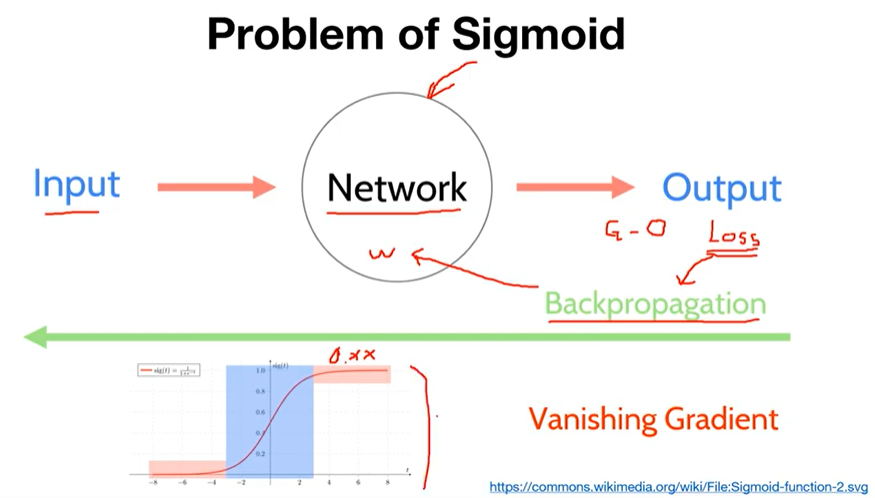

입력값이 들어오게 되면 Weight를 곱하여 sigmoid를 activation으로 사용하여 output을 구하게된다. 그리고 정답데이터와 output의 차이를 구하여 loss(cost)를 구하게된다. 이렇게 loss를 구하면 미분을 통해 gradient를 구하게되고 gradient를 Backpropagation알고리즘을 통해서 weight를 업데이트를 하는 방식을 사용한다.

여기서 Sigmoid의 문제점은 gradient를 계산하면서 발생하게 된다. 위의 그림을 보게되면 파란색영역은 gradient값이 잘 계산이 되고 값이 잘나오지만 양끝 빨간색영역에서는 0에 가까운 매우 작은 값이 나오게된다. 

우리가 Backpropagation알고리즘을 통해 gradient를 앞으로 보낼때 activation function에서 gradient를 곱할때 아주 작은 값을 곱하게되면서 뒤에서 loss로부터 전파되는 gradient가 소멸되는 문제가 발생한다. **이런현상을 Vanishing Gradient라고 한다.**

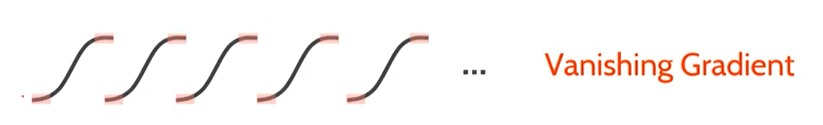

위에그림처럼 빨간색 영역의 gradient를 뒤에서 부터 계속하여 전파받았을 때, 앞에서는 gradient를 거의 전파 받을 수 없게 된다. 

아래사진을 보면 알 수 있게된다.

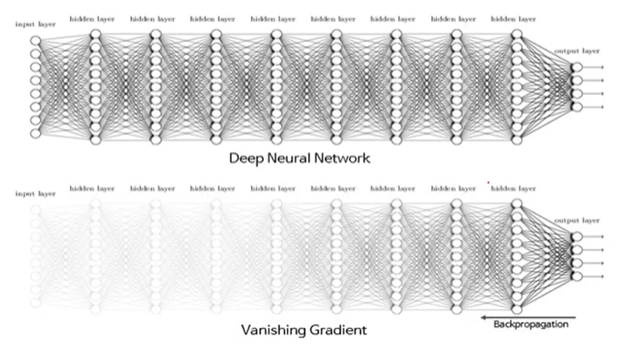

**ReLU**

f(x) = max(0,x)
- ReLU activation function의 입력을 얻어 x가 들어왔을때 만약 x가 0보다 크면 자기자신을 출력하고 음수이면 0으로 출력한다.

그래프로 보게되면 아래와 같다.

0을기준으로 gradient가 빨간쪽이 0 파란쪽이 1이된다.

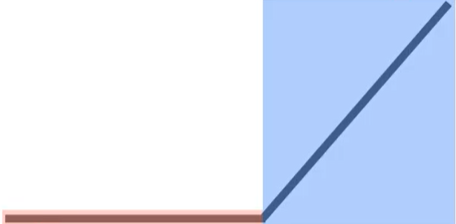

매우 간단하지만 효과가 좋다.

파란색 부분에서는 gradient가 1이기 때문에 Vanishing Gradient가 발생하지 않는다.

하지만 음수로 activation이 되는 경우에는 gradient가 사라지긴한다.

PyTorch에서는 x = torch.nn.relu(x)형식으로 사용가능하다.


이외에도 torch.nn.sigmoid(x) / torch.nn.tanh(x) / torch.nn.relu(x) / torch.nn.leaky_relu(x,0.01) 등이있다.

**Optimizer in PyTorch**

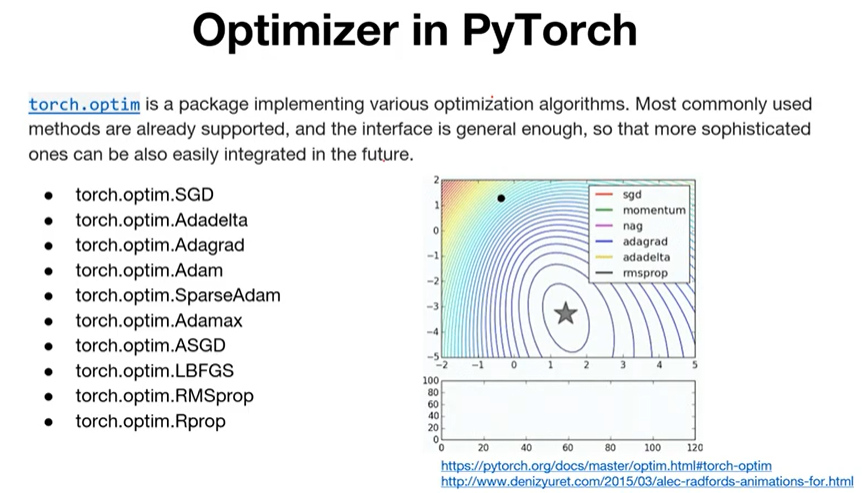

torch. optim이라는 패키지에 들어가면 다양한 optimizer 알고리즘이 구현되어있다. 여기에는 주로 많이 사용되는 알고리즘들로 구성되어있다.

아래는 각각의 optimizer들이 어떻게 발전이되고 어떤 특성을 가지고 있는지 정리한 자료이다. 오솔길 찾는것을 optimization이라고 봤을 때 어떤 전략으로 각 optimizer들이 움직이는지 정리한 자료이다.

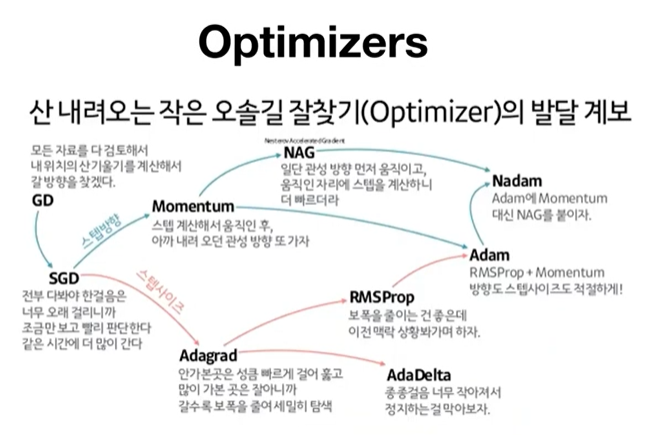

**MNIST를 PyTorch에서 읽는 방법 Review**

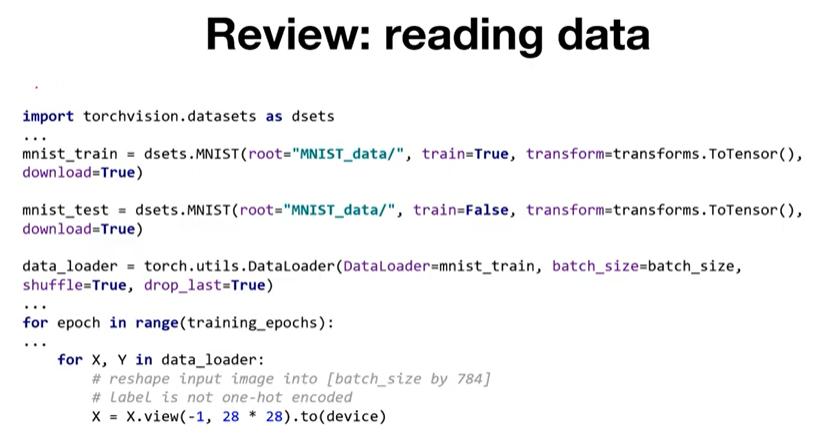

**mnist_classifier**

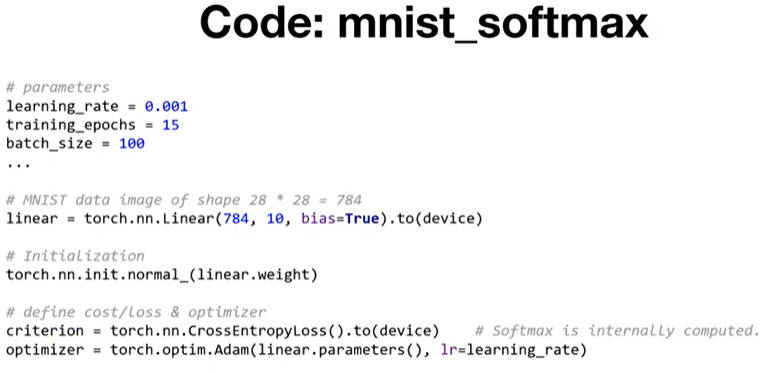

linear모델에 입력값은 784(28*28), output은 10개(0~9)로 선언한다.

weight값을 normal destribution으로 초기화

optimizer선언할 때 저번 7장에서는 SGD를 했지만 여기서는 Adam을 이용해보았다.

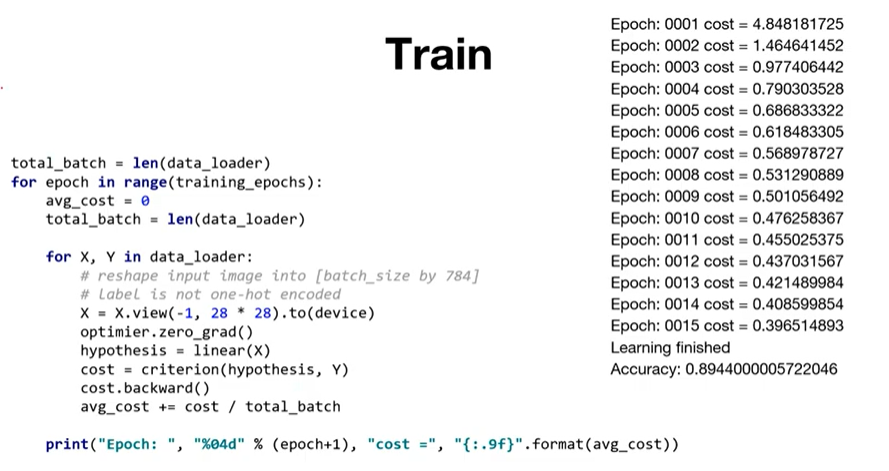

dataloader로 X에 MNIST 이미지, Y에 label을 불러오고 불러온이미지를 뉴럴네트워크에 통과시키고 결과와 실제정답과의 차이로 cost를 구해오고 cost로 gradient를 계산하여 파라이터를 업데이트 하게된다.

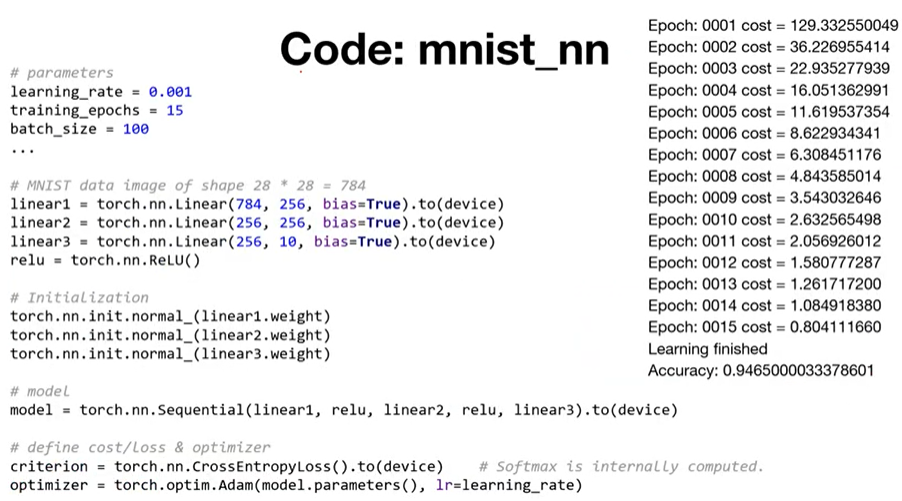

Sequential에 3번째 relu를 적용하지 않은 것은 CrossEntropyLoss를 사용할 것이기때문에 softmax로 activation을 해주었다.

optimizer는 Adam으로 하였다.

실제 학습에 사용되는 코드는 이전의 코드와 동일하고, 학습을 올려보게되면 오른쪽에있는 결과가 나오게된다.

학습결과 한개의 layer보다 세개의 layer에 relu를 사용하는 것이 더 좋다는 것을 볼 수 있다.